# fitting using BAFFLES
* https://github.com/adamstanfordmoore/BAFFLES

BAFFLES needs `B-V` color magnitudes, `log(R'_HK)`, and `LiEW` or Lithium equivalent width measurement from optical spectra and Teff. 

Using `Target.query_vizier_param()`, I compiled useful parameters into a table.

In [1]:
import pandas as pd

data = pd.read_csv('../data/youth_indicators_tois.csv')
data

,TOI,bv,bv_err,li,prot,rhk,teff
0,101.01,0.656000,0.1,NaN,1.430321,NaN,5648.642857
1,102.01,0.507667,0.1,NaN,4.410011,NaN,6257.270417
2,103.01,0.291000,0.1,NaN,3.554638,NaN,6086.159167
3,104.01,0.545667,0.1,NaN,4.090360,NaN,6046.516250
4,105.01,0.687667,0.1,NaN,2.187803,NaN,5741.285333
...,...,...,...,...,...,...,...
4312,5023.01,NaN,NaN,NaN,NaN,NaN,3720.494840
4313,5024.01,0.612000,NaN,NaN,NaN,NaN,5985.393333
4314,5025.01,0.313000,NaN,NaN,NaN,NaN,8132.166667
4315,5026.01,0.700000,NaN,NaN,NaN,NaN,6444.962144


In [2]:
data.dropna(how='any')

,TOI,bv,bv_err,li,prot,rhk,teff
98,200.01,0.735647,0.048146,108.107498,5.475,-4.09,5482.444615


In [3]:
d=data.query("TOI==200.01").squeeze()
d

TOI        200.010000
bv           0.735647
bv_err       0.048146
li         108.107498
prot         5.475000
rhk         -4.090000
teff      5482.444615
Name: 98, dtype: float64

In [4]:
# no measurement errors from vizier so let's assume some values
bv,rhk,li = d.bv, d.rhk, d.li
bv_err,li_err = 0.1, 50

# BAFFLES

There are two ways to estimate age using baffles: using (1) Lithium (LiEW), and using (2) Calcium (logR'HK), If both Li and Ca measurements are available, then age estimation is more reliable.

In [5]:
import os

os.chdir('../BAFFLES/')

In [6]:
from baffles import *

Ca Median Age: 99.4 Myr, 68% CI: 22 - 665 Myr, 95% CI: 4.53 - 4.13e+03 Myr
Li Median Age: 4.02e+03 Myr, 68% CI: 634 - 9.71e+03 Myr, 95% CI:         132 - 1.25e+04 Myr
Final Median Age: 154 Myr, 68% CI: 37.8 - 460, 95% CI: 7.99 - 2.05e+03


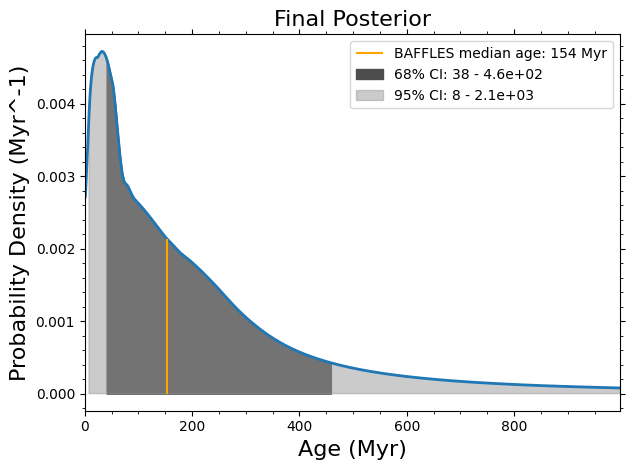

In [7]:
result = baffles_age(bv, 
                     rhk,
                     li,
                     bv_err,
                     li_err,
                     upperLim=False,
                     maxAge=None,
                     fileName='baffles',
                     showPlots=False,
                     savePlots=False, 
                     savePostAsText=False
                     )

## Ca only

In [8]:
bv, bv_err = 0.670571, 0.01 
rhk = -4.35
li, li_err = 0.166, 0.1

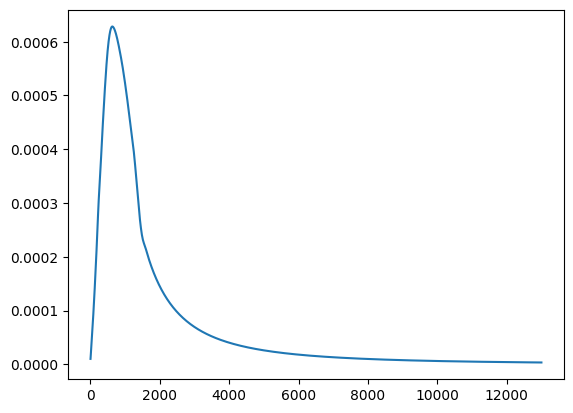

In [9]:
import matplotlib.pyplot as plt

baffles_ca = age_estimator('calcium')
post_ca = baffles_ca.get_posterior(bv=bv,
                                   metallicity=-4.5)

ca_const = utils.init_constants('calcium')
plt.plot(ca_const.AGE, post_ca.array)

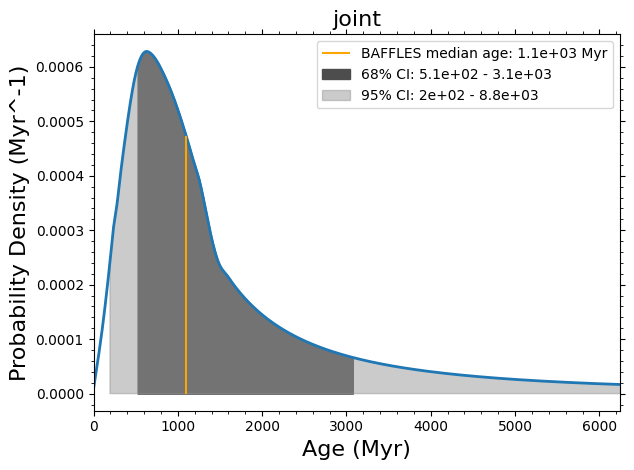

In [10]:
import probability as prob

y = post_ca.array #* post_li.array
prob.normalize(ca_const.AGE, y)
stats = prob.stats(ca_const.AGE, y)
my_plot.posterior(ca_const.AGE, y, prob.stats(ca_const.AGE, y), 'joint', showPlot=False)

## Exercise
* Run gyro-interp in all TOI and known host stars in NExSci (see `youth_indicators_nexsci.csv`) 
* Update the TOI and nexsci tables using data from previous research